# Part II - Presentation of Key Insights from the Exploration of the Loan Data from Prosper Dataset

## by Ubogun O. Divine-Favour

## Investigation Overview

The investigation focuses on conveying certain insights obtained in the exploratory analysis of the loans in the Loan Data from Prosper dataset. The insights include:<br>
1. Most loans taken for student use are usually completed.
2. High-income earners are more likely to take loans for debt consolidation. 
3. Loans with longer loan lengths have a higher interest rate. 
4. Borrowers who take high loan amounts are more likely to opt for long-term loans. 
5. High-income earners are more likely to take high loan amounts.
6. Lower loan amounts for each loan length, are more likely to be defaulted or charged off. 
7. For each loan length, loans with higher interest rates will likely get defaulted, charged off or not paid in time.

## Dataset Overview

The Loan Data from Prosper dataset originally has over 110,000 loan entries on 81 variables but was modified into only 14,882 loan entries on 13 variables for the analysis. The variables include the loan amount (__LoanOriginalAmount__), interest rate (__BorrowerRate__), loan length (__Term__), loan listing category (__ListingCategory__), loan status (__LoanStatus__), 
borrowers' income range (__IncomeRange__) and other characteristics of the borrowers. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper_loans = pd.read_csv("prosperLoanData.csv")


The dataset will be cleaned to remove rows and columns not needed for this analysis.

In [3]:
def drop_unwanted_cols(df, list_of_cols_to_keep): 
    """This function selects out unwanted columns in a dataframe 
    and drops them"""
    new_list = []
    for col in df.columns: 
        if col not in list_of_cols_to_keep: 
            new_list.append(col) 
    return df.drop(new_list, axis = 1) 


In [4]:
#create a list of wanted columns
wanted_cols = ["Term","LoanOriginalAmount", "LoanStatus", "BorrowerAPR", "BorrowerRate", "ListingCategory (numeric)", "BorrowerState", "Occupation", "EmploymentStatus", "IsBorrowerHomeowner", "IncomeRange"]

#apply the drop_unwanted_cols function to the dataframe  
prosper_loans = drop_unwanted_cols(prosper_loans, wanted_cols)


In [5]:
#make copy of dataset to clean 
loans_clean = prosper_loans.copy()

In [6]:
#drop duplicated rows 
loans_clean.drop_duplicates(inplace = True)

In [7]:
def rename_pastdue(x): 
    """The function renames every variation of "Past Due" values 
    to just "Past Due"""
    
    if "Past Due" in x: 
        return "Past Due" 
    else: 
        return x

In [8]:
#apply rename_pastdue on LoanStatus column 
loans_clean["LoanStatus"] = loans_clean["LoanStatus"].apply(rename_pastdue)

#confirm 
loans_clean.LoanStatus.unique()


array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [9]:
def list_category(x): 
    """This function changes each numeric value in the "ListingCategory (numeric)" column 
    to its appropriate word meaning"""
    
    cat_listing = {0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 
                   3 : "Business", 4 : "Personal Loan", 5 : "Student Use", 6 : "Auto", 
                   7 : "Other", 8 : "Baby & Adoption", 9 : "Boat", 10 : "Cosmetic Procedure", 
                   11 : "Engagement Ring", 12 : "Green Loans", 13 : "Household Expenses", 
                   14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV", 
                   18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}
    for key, value in cat_listing.items(): 
        if x == key: 
            return cat_listing[key] 
        

In [10]:
#apply function 
loans_clean["ListingCategory (numeric)"] = loans_clean["ListingCategory (numeric)"].apply(list_category)

#check 
loans_clean["ListingCategory (numeric)"].value_counts().sort_values()


RV                       52
Green Loans              58
Boat                     85
Cosmetic Procedure       91
Baby & Adoption         196
Engagement Ring         214
Motorcycle              304
Student Use             756
Wedding Loans           762
Vacation                764
Large Purchases         863
Taxes                   882
Medical/Dental         1507
Household Expenses     1984
Personal Loan          2393
Auto                   2568
Business               7145
Home Improvement       7379
Other                 10427
Not Available         16518
Debt Consolidation    57247
Name: ListingCategory (numeric), dtype: int64

In [11]:
#Rename the "ListingCategory (numeric)" column 
loans_clean.rename(columns = {"ListingCategory (numeric)" : "ListingCategory"}, inplace = True)

#confirm 
loans_clean.head(1)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount
0,36,Completed,0.16516,0.158,Not Available,CO,Other,Self-employed,True,"$25,000-49,999",9425


In [12]:
def make_title(x): 
    """This function capitalizes the first letter of each
    word in a string"""
    if type(x) == str: 
        return x.title() 
    else: 
        return x 
    

In [13]:
#apply function on dataframe 
loans_clean["EmploymentStatus"] = loans_clean["EmploymentStatus"].apply(make_title) 
loans_clean["IncomeRange"] = loans_clean["IncomeRange"].apply(make_title)

#view random rows 
print(loans_clean.EmploymentStatus.unique()) 
loans_clean.IncomeRange.unique() 


['Self-Employed' 'Employed' 'Not Available' 'Full-Time' 'Other' nan
 'Not Employed' 'Part-Time' 'Retired']


array(['$25,000-49,999', '$50,000-74,999', 'Not Displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not Employed', '$0'], dtype=object)

In [14]:
def change_to_null(x): 
    """The function changes "Not Available" and "Not 
    Displayed" values in a column to null values"""
    
    if x == "Not Available" or x == "Not Displayed":
        return np.nan
    else:
        return x 
    

In [15]:
#apply on dataframe 
loans_clean = loans_clean.applymap(change_to_null)

#confirm 
loans_clean.query('EmploymentStatus == "Not Available" or IncomeRange == "Not Displayed" or ListingCategory == "Not Available"') 


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [16]:
#select out rows with zero dollars income range
zero_dollars_df = loans_clean.query('IncomeRange == "$0"')  

#filter out rows that belong to people with jobs 
zero_with_job = zero_dollars_df.query('EmploymentStatus == "Full-Time" or EmploymentStatus == "Self-Employed" or EmploymentStatus == "Employed" or EmploymentStatus == "Part-Time"')


In [17]:
#drop rows in zero_with_job 
loans_clean.drop(zero_with_job.index, inplace = True) 


In [18]:
#confirm for "Full-Time" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Full-Time"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [19]:
#confirm for "Self-Employed" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Self-Employed"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [20]:
#confirm for "Employed" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Employed"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [21]:
#confirm for "Part-Time" EmploymentStatus
loans_clean.query('IncomeRange == "$0" & EmploymentStatus == "Part-Time"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [22]:
def zero_dollar(x): 
    """This function replaces every "Not Employed"
    value with a "$0" value"""
    if x == "Not Employed": 
        return "$0"
    else: 
        return x 
    

In [23]:
#apply the zero_dollar function on IncomeRange column 
loans_clean["IncomeRange"] = loans_clean["IncomeRange"].apply(zero_dollar) 

#confirm 
loans_clean.IncomeRange.unique()


array(['$25,000-49,999', '$50,000-74,999', nan, '$100,000+',
       '$75,000-99,999', '$1-24,999', '$0'], dtype=object)

In [24]:
#filter out rows with "Current" loan status 
current_loans = loans_clean.query('LoanStatus == "Current"') 

#drop rows with "Current" loan status 
loans_clean.drop(current_loans.index, inplace = True) 

#confirm 
loans_clean.query('LoanStatus == "Current"') 


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [25]:
#select out rows with "Other" value in employment status column 
other_status = loans_clean[loans_clean["EmploymentStatus"] == "Other"] 

#drop the rows 
loans_clean.drop(other_status.index, inplace = True) 

#confirm 
loans_clean[loans_clean["EmploymentStatus"] == "Other"] 


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount


In [26]:
def job_status(col_name): 
    """This function returns a list containing values 
    of "Working" or "Not Working" for a borrower's job 
    status"""
    status_list = [] 
    for x in col_name: 
        if x == "Not Employed" or x == "Retired":
            status_list.append("Not Working") 
        
        else:
            status_list.append("Working") 
    return status_list


In [27]:
#apply the function to the EmploymentStatus column 
#and assign the list returned to a new variable 
job_status_list = job_status(loans_clean.EmploymentStatus) 

#create new column for job status in clean loans dataframe
loans_clean["JobStatus"] = job_status_list


In [28]:
#confirm for borrowers with "Full-Time" employment status 
loans_clean.query('EmploymentStatus == "Full-Time" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [29]:
#confirm for borrowers with "Part-Time" EmploymentStatus
loans_clean.query('EmploymentStatus == "Part-Time" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [30]:
#confirm for borrowers with "Self-Employed" EmploymentStatus
loans_clean.query('EmploymentStatus == "Self-Employed" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [31]:
#confirm for borrowers with "Employed" EmploymentStatus 
loans_clean.query('EmploymentStatus == "Employed" & JobStatus == "Not Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [32]:
#confirm for borrowers with "Not Employed" EmploymentStatus 
loans_clean.query('EmploymentStatus == "Not Employed" & JobStatus == "Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [33]:
#confirm for borrowers with "Retired" EmploymentStatus 
loans_clean.query('EmploymentStatus == "Retired" & JobStatus == "Working"')


,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus


In [34]:
#Rename Term variable 
loans_clean.rename(columns = {"Term" : "TermMonths"}, inplace = True)

#confirm 
loans_clean.head(1)


,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus
0,36,Completed,0.16516,0.158,NaN,CO,Other,Self-Employed,True,"$25,000-49,999",9425,Working


In [35]:
def term_words(col_name): 
    """This function returns a list of the term 
    (in words) each loan belongs in"""
    term_list = [] 
    for x in col_name: 
        if x == 12: 
            term_list.append("Short Term") 
        elif x == 36: 
            term_list.append("Mid Term")
        else: 
            term_list.append("Long Term")
    return term_list 


In [36]:
#apply function to TermMonths column 
term_words_list = term_words(loans_clean.TermMonths)

#create a new variable for the term in words 
loans_clean["Term"] = term_words_list


In [37]:
#confirm by viewing random rows
print(loans_clean.TermMonths.value_counts()) 

loans_clean.Term.value_counts()


36    49535
60     4276
12     1505
Name: TermMonths, dtype: int64


Mid Term      49535
Long Term      4276
Short Term     1505
Name: Term, dtype: int64

In [38]:
#create loop to change TermMonths, IncomeRange and Term datatypes to category
ord_data_dict = {"TermMonths": [12, 36, 60], 
            "IncomeRange": ["$0", "$1-24,999", "$25,000-49,999" 
                             "$50,000-74,999", "$75,000-99,999", "$100,000+"], 
                 "Term": ["Short Term", "Mid Term", "Long Term"]
                }
for ord_data in ord_data_dict: 
    ord_cat = pd.api.types.CategoricalDtype(ordered = True, categories = ord_data_dict[ord_data]) 
    loans_clean[ord_data] = loans_clean[ord_data].astype(ord_cat)


In [39]:
#confirm 
loans_clean.dtypes

TermMonths             category
LoanStatus               object
BorrowerAPR             float64
BorrowerRate            float64
ListingCategory          object
BorrowerState            object
Occupation               object
EmploymentStatus         object
IsBorrowerHomeowner        bool
IncomeRange            category
LoanOriginalAmount        int64
JobStatus                object
Term                   category
dtype: object

In [40]:
#drop null values
loans_clean.dropna(inplace = True)


In [41]:
#obtain number of rows and columns of clean dataset
loans_clean.shape 


(14882, 13)

In [42]:
#drop outlier interest rate rows
low_rates = loans_clean.query('BorrowerRate >= 0.00 & BorrowerRate < 0.02') 
high_rates = loans_clean.query('BorrowerRate >= 0.35 & BorrowerRate < 0.36')


In [43]:
#drop BorrowerRate outlier rows 
loans_clean.drop(low_rates.index, inplace = True) 
loans_clean.drop(high_rates.index, inplace = True) 

#confirm 
#for low interest rates 
loans_clean.query('BorrowerRate >= 0.00 & BorrowerRate < 0.02')



,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus,Term


In [44]:
#for high interest rates 
loans_clean.query('BorrowerRate >= 0.35 & BorrowerRate < 0.36')


,TermMonths,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,JobStatus,Term


## Percentage Proportion of Loan Status for Loans taken for Student Use 

The bar chart below depicts the percentage proportion of each loan status for loans taken for student use. It shows that 75.34% of these student use loans are completed. Thereby indicating that most loans taken for student use are usually completed.

In [45]:
#select out rows with listing category as Student Use
student_use = loans_clean.query('ListingCategory == "Student Use"')

#get the count for each loan status
loan_stats_count = student_use.LoanStatus.value_counts() 

#get the total number of loan status values 
total_student_stats = loan_stats_count.sum()

#obtain status order for the student use data 
stat_order = loan_stats_count.index


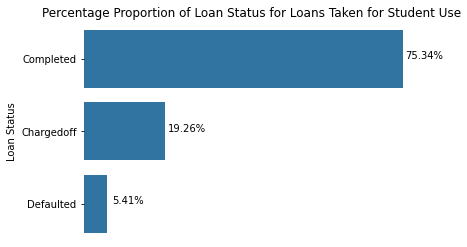

In [46]:
#choose color 
base_color = sb.color_palette()[0]

#visualize 
g = sb.countplot(data = student_use, y = "LoanStatus", color = base_color, 
            order = stat_order)

#input percentage of each status as texts on their respective bars
for i in range(loan_stats_count.shape[0]):
    count = loan_stats_count[i]
    pct_text = "{:0.2f}%".format(100 * (count/total_student_stats))
    plt.text(count + 15, i , pct_text, ha = "center");  
    
#remove spines 
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
g.spines["left"].set_visible(False)
g.spines["bottom"].set_visible(False)

#remove x-axis 
g.get_xaxis().set_visible(False)

plt.ylabel("Loan Status")
plt.title("Percentage Proportion of Loan Status for Loans Taken for Student Use");


## Income Range Level Distribution for Debt Consolidation Loans. 

The bar chart below shows the frequency or sum of borrowers who took loans for debt consolidation in their various income levels. In the bar chart, the number of high-income earners shown is far more than the number of low-income earners, which supports the finding that high-income earners are more likely to take loans for debt consolidation.

In [47]:
#filter out debt consolidation rows 
debt_cons = loans_clean[loans_clean["ListingCategory"] == "Debt Consolidation"] 

#select out the count of each income range 
cons_inc1 = debt_cons[debt_cons["IncomeRange"] == "$0"].IncomeRange.count()
cons_inc2 = debt_cons[debt_cons["IncomeRange"] == "$1-24,999"].IncomeRange.count()
cons_inc3 = debt_cons[debt_cons["IncomeRange"] == "$25,000-49,999"].IncomeRange.count() 
cons_inc4 = debt_cons[debt_cons["IncomeRange"] == "$50,000-74,999"].IncomeRange.count() 
cons_inc5 = debt_cons[debt_cons["IncomeRange"] == "$75,000-99,999"].IncomeRange.count()
cons_inc6 = debt_cons[debt_cons["IncomeRange"] == "$100,000+"].IncomeRange.count()


In [48]:
#get total value for low income earners 
#sum of count for income range $0 - $74,999
total_low_inc = cons_inc1 + cons_inc2

#get total value for higher income earners 
#sum of count for income range $75,000-99,999
#and $100,0000+ 
total_high_inc = cons_inc5 + cons_inc6


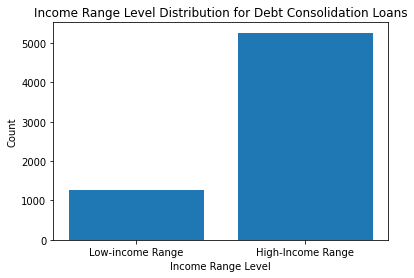

In [49]:
#set bar chart parameters 
x_num = np.arange(2)
y_values = [total_low_inc, total_high_inc]
labels = ["Low-income Range", "High-Income Range"]

#plot 
plt.bar(x_num, y_values, tick_label = labels)
plt.xlabel("Income Range Level")
plt.ylabel("Count")
plt.title("Income Range Level Distribution for Debt Consolidation Loans");


## Effect of Loan Length on Interest Rate 

The point and violin plots created below depict the relationship between interest rate and loan length.

In the point plot, there is an obvious increase in the average interest rate from short term to long term. A similar progression is also seen in the violin plot, with more values distributed in higher interest rates as the loan length goes from short to long term, showing that longer-term loans have a higher interest rate.


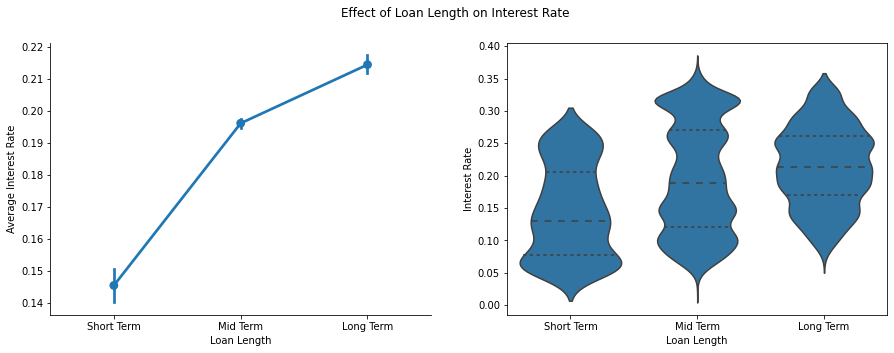

In [50]:
#set fig size 
plt.figure(figsize = (15, 5)) 

#subplot for point plot 
plt.subplot(1, 2, 1)
g = sb.pointplot(data = loans_clean, x = "Term", y = "BorrowerRate",
             color = base_color);

#remove top and right spines
g.spines["top"].set_visible(False)
g.spines["right"].set_visible(False)
plt.xlabel("Loan Length") 
plt.ylabel("Average Interest Rate")

#subplot for violin plot
plt.subplot(1, 2, 2) 
sb.violinplot(data = loans_clean, x = "Term", y = "BorrowerRate", 
              color = base_color, inner = "quartile"); 
plt.xlabel("Loan Length") 
plt.ylabel("Interest Rate")

#set title of figure
plt.suptitle("Effect of Loan Length on Interest Rate"); 


## Distribution of Loan Amount by Loan Length

A violin plot was created below to show the relationship between the loan amount and interest rate. The plot shows an increase in loan amount distribution from short term to long term, and long term loans have the most distribution of values at high-interest rates, supporting the finding that borrowers taking high loan amounts are more likely to opt for long-term loans.


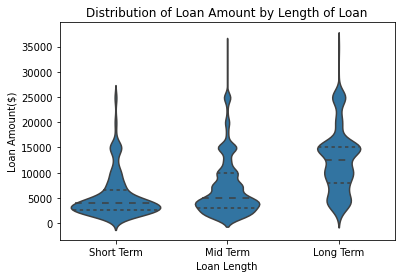

In [51]:
#visualize
sb.violinplot(data = loans_clean, x = "Term", y = "LoanOriginalAmount", 
              color = base_color, inner = "quartile");

plt.xlabel("Loan Length") 
plt.ylabel("Loan Amount($)")
plt.title("Distribution of Loan Amount by Length of Loan");


##  Distribution of Loan Amount by Income Range

A bar plot was used to depict the relationship between the income range of borrowers and loan amount. The plot shows that borrowers having an income value within the \\$75,000-100,000+ range take higher loan amounts, with borrowers that earn \\$100,000+ having the highest average loan amount, indicating that high-income earners are more likely to take high loan amounts. 

In [52]:
#obtain the average loan amount for each income range values 
range1_mean = loans_clean[loans_clean["IncomeRange"] == "$0"].LoanOriginalAmount.mean() 
range2_mean = loans_clean[loans_clean["IncomeRange"] == "$1-24,999"].LoanOriginalAmount.mean() 
range3_mean = loans_clean[loans_clean["IncomeRange"] == "$25,000-49,999"].LoanOriginalAmount.mean() 
range4_mean = loans_clean[loans_clean["IncomeRange"] == "$50,000-74,999"].LoanOriginalAmount.mean() 
range5_mean = loans_clean[loans_clean["IncomeRange"] == "$75,000-99,999"].LoanOriginalAmount.mean() 
range6_mean = loans_clean[loans_clean["IncomeRange"] == "$100,000+"].LoanOriginalAmount.mean() 


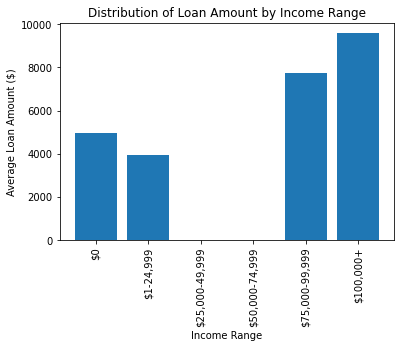

In [53]:
#set parameters for bar plot
x_num = np.arange(6) 
y_values = [range1_mean, range2_mean, range3_mean, range4_mean, range5_mean,
            range6_mean]
labels = ["$0", "$1-24,999", "$25,000-49,999", 
          "$50,000-74,999", "$75,000-99,999",
          "$100,000+"] 

#plot bar plot 
plt.bar(x_num, y_values, tick_label = labels)
plt.xticks(rotation = 90)
plt.xlabel("Income Range")
plt.ylabel("Average Loan Amount ($)");
plt.title("Distribution of Loan Amount by Income Range"); 


## Distribution of Loan Status by Loan Amount and Loan Length 

In the bar plot used to show the relationship between loan amount, loan status and loan length below, usually, for each term, the lower loan amounts can be seen to have a defaulted or charged off loan status. This supports the finding that lower loan amounts for each loan length, are more likely to be defaulted or charged off.

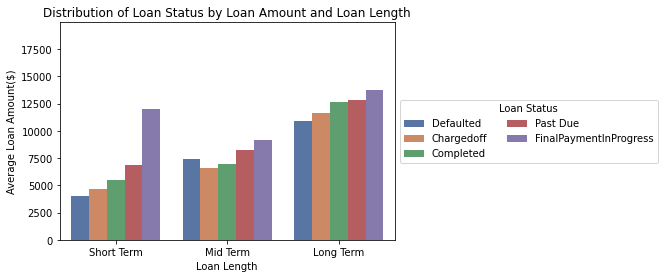

In [54]:
#create order by which the hue is created
order_hue = ["Defaulted", "Chargedoff", "Completed", 
             "Past Due", "FinalPaymentInProgress"]

#visualize
sb.barplot(data = loans_clean, x = "Term", y = "LoanOriginalAmount", 
           hue = "LoanStatus", hue_order = order_hue, palette = "deep", 
           errwidth = 0);
plt.legend(title = "Loan Status", ncol = 2, loc = 6, bbox_to_anchor = (1.0, 0.5));
plt.xlabel("Loan Length") 
plt.ylabel("Average Loan Amount($)")
plt.title("Distribution of Loan Status by Loan Amount and Loan Length"); 


## Distribution of Loan Status by Interest Rate and Loan Length  

The point plot visualizes the relationship between loan length, loan status, and interest rates. 

For each loan length in the plot, generally, higher interest rate loans can be seen to have a defaulted or charged off or past due loan status, supporting the finding that for each loan length, loans with higher interest rates will likely get defaulted, charged off or not paid in time.



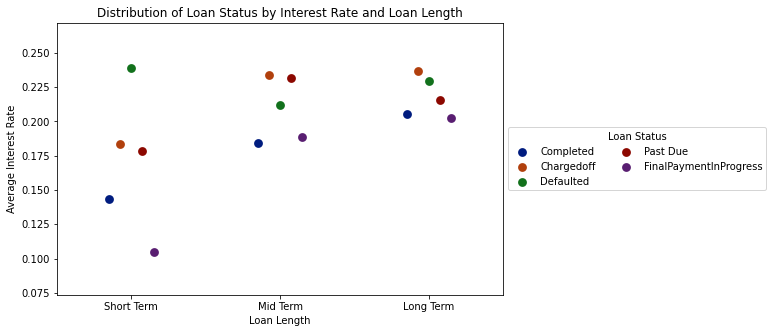

In [55]:
#set figure 
plt.figure(figsize = (8,5))

#visualise
sb.pointplot(data = loans_clean, x = "Term", y = "BorrowerRate", 
           hue = "LoanStatus", palette = "dark", 
             dodge = 0.3, linestyles = "", errwidth = 0);

#set legend
plt.legend(title = "Loan Status", ncol = 2, loc = 6, bbox_to_anchor = (1.0, 0.5)); 
plt.xlabel("Loan Length") 
plt.ylabel("Average Interest Rate") 
plt.title("Distribution of Loan Status by Interest Rate and Loan Length");


In [ ]:
!jupyter nbconvert Part_II_Loan_Data_from_Prosper.ipynb --to slides --post serve --no-input --no-prompt 


[NbConvertApp] Converting notebook Part_II_Loan_Data_from_Prosper.ipynb to slides
[NbConvertApp] Writing 775357 bytes to Part_II_Loan_Data_from_Prosper.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_Loan_Data_from_Prosper.slides.html
Use Control-C to stop this server
